# Customer Churn Prediction

In [1]:
# Importing libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2024-12-10 10:43:35.474557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 10:43:35.572591: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 10:43:35.654276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 10:43:36.400972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("data/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [6]:
X = df.drop(columns=["Exited"])
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = Sequential()

# Adding nodes in hidden layer
model.add(Dense(10, activation="relu", input_dim=11))
model.add(Dense(10, activation="relu"))

# Adding output layer
model.add(Dense(1, activation="sigmoid"))

/home/anish/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733807654.931225   46140 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733807662.398319   46140 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733807662.403419   46140 cuda_executo

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss="binary_crossentropy" ,optimizer="Adam", metrics=["accuracy"])

In [11]:
history = model.fit(X_train_scaled, y_train, epochs=25, validation_split=0.2)

Epoch 1/25


I0000 00:00:1733807683.326149   47249 service.cc:146] XLA service 0x7f3248008660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733807683.326238   47249 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-12-10 10:44:44.267451: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-10 10:44:44.693787: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 40/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - loss: 0.6578

I0000 00:00:1733807688.510628   47249 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7168 - loss: 0.5950 - val_accuracy: 0.8006 - val_loss: 0.4871
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7899 - loss: 0.4772 - val_accuracy: 0.8081 - val_loss: 0.4470
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8079 - loss: 0.4370 - val_accuracy: 0.8156 - val_loss: 0.4293
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8140 - loss: 0.4295 - val_accuracy: 0.8225 - val_loss: 0.4159
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8215 - loss: 0.4177 - val_accuracy: 0.8281 - val_loss: 0.4050
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8375 - loss: 0.3881 - val_accuracy: 0.8375 - val_loss: 0.3967
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8397 - loss: 0.3916 - val_accuracy: 0.8356 - val_loss: 0.3871
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8377 - loss: 0.3800 - val_accuracy: 0.8456 - val_

In [12]:
model.layers[0].get_weights()

[array([[ 0.08837672, -0.10072485,  0.34738344, -0.05129543,  0.18003489,
          0.13145222,  0.02254377, -0.5527386 , -0.00809243,  0.01566742],
        [ 0.03724313, -0.8136136 ,  0.5606322 , -0.5880421 , -0.7604918 ,
         -0.5428782 ,  0.03717165,  0.51827985, -0.6686187 ,  0.25657845],
        [ 0.11323058, -0.21861625,  0.1434905 ,  0.07889684, -0.06656966,
          0.24866882,  0.12930268, -0.11886856,  0.20751673, -0.37612292],
        [-0.4225436 ,  0.06259424,  0.07128505,  0.10025255,  0.27151543,
          0.19389124,  0.09922788, -0.15058783, -0.6089092 ,  0.63137656],
        [-1.3766371 ,  0.18082654,  0.19948132,  0.01708111, -0.16581944,
         -0.18939218,  1.1757164 , -0.09124257,  0.05051125,  0.35227123],
        [-0.11325601,  0.01948206,  0.15218036, -0.1421111 , -0.12462424,
          0.2560236 , -0.10831151,  0.10515902, -0.2009442 ,  0.09493803],
        [-0.47330502, -0.4584712 ,  0.36295044, -0.17200206, -0.36849695,
         -0.46523455, -0.2832432

In [13]:
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred>0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [14]:
accuracy_score(y_test, y_pred)

0.8605

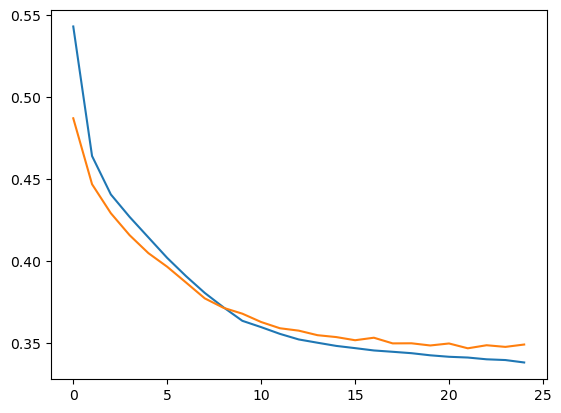

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

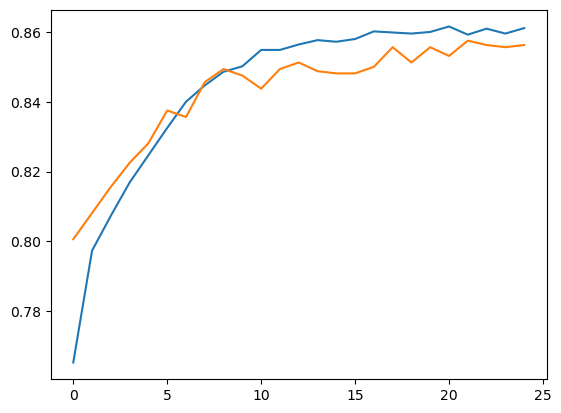

In [17]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])